In [1]:
from analyze_book_name_functions import *
from crop_functions import *
import ast

In [2]:
df = pd.read_csv('pic6_df.csv')
columns_to_convert = ['crop_idx', 'vertices', 'boundBox', 'mid_point', 'slopes']
for column in columns_to_convert:
    df[column] = df[column].apply(ast.literal_eval)
# for i in df.iloc[0]:
#     print(f"{i}: {type(i)}")
# df

In [8]:
def show_distance_check(img2, ref_point, x_offset:int = 0, y_offset:int = 0):
    mask = np.zeros_like(img2)
    mid_point = (ref_point.mid_point[0] - x_offset, ref_point.mid_point[1] - y_offset)
    
    for y in range(img2.shape[0]):
        for x in range(img2.shape[1]):
            if "vertical" == ref_point.direction:
                slope1 = ref_point.slopes[0]
            elif "horizontal" == ref_point.direction:
                slope1 = ref_point.slopes[1]
            else:
                slope1 = 0
            distance = distance_relative_wh(mid_point, (x, y), ref_point.width, ref_point.height, slope1)
            if distance < 1:
                mask[y, x] = [255, 0, 0]  # Set the mask to blue (in RGB) for pixels that pass the distance function
    
    result = cv2.addWeighted(img2, 0.7, mask, 0.3, 0)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(result)
    plt.axis('off')
    plt.show()

In [7]:
df

txt  confidence                                           vertices  \
0        ated         100         [(0, 187), (74, 194), (71, 226), (0, 219)]   
1       808.3         100  [(184, 1168), (242, 1169), (242, 1183), (184, ...   
2         BUC         100  [(185, 1193), (218, 1194), (218, 1207), (185, ...   
3           A         100   [(219, 349), (219, 384), (187, 384), (187, 349)]   
4    Writer's         100   [(219, 398), (221, 557), (189, 557), (187, 398)]   
..        ...         ...                                                ...   
421    POETRY         100  [(3871, 560), (3859, 638), (3839, 635), (3851,...   
422        OF         100  [(3878, 518), (3874, 543), (3853, 540), (3857,...   
423      BOOK         100  [(3888, 451), (3880, 503), (3860, 500), (3868,...   
424       THE         100  [(3896, 396), (3890, 436), (3870, 432), (3876,...   
425       Sor         100  [(3963, 228), (4030, 229), (4030, 298), (3963,...   

                                              boundBox           slopes  \
0    {'Width': 74, 'Height': 39, 'Left': 0, 'Top': ...  (0.034, -3.832)   
1    {'Width': 58, 'Height': 15, 'Left': 184, 'Top'...  (0.006, -300.0)   
2    {'Width': 33, 'Height': 14, 'Left': 185, 'Top'...  (0.011, -300.0)   
3    {'Width': 32, 'Height': 35, 'Left': 187, 'Top'...   (-300.0, -0.0)   
4    {'Width': 34, 'Height': 159, 'Left': 187, 'Top...   (28.558, -0.0)   
..                                                 ...              ...   
421  {'Width': 32, 'Height': 81, 'Left': 3839, 'Top...  (-2.335, 0.054)   
422  {'Width': 25, 'Height': 28, 'Left': 3853, 'Top...  (-2.245, 0.051)   
423  {'Width': 28, 'Height': 55, 'Left': 3860, 'Top...  (-2.335, 0.054)   
424  {'Width': 26, 'Height': 43, 'Left': 3870, 'Top...  (-2.395, 0.072)   
425  {'Width': 67, 'Height': 70, 'Left': 3963, 'Top...  (0.005, -300.0)   

         width      height   direction         mid_point crop_idx  Left   Top  
0    32.140317   74.330344  horizontal    (36.25, 206.5)   (0, 0)     0   187  
1    14.000000   58.008620  horizontal   (213.0, 1175.5)   (0, 0)   184  1168  
2    13.000000   33.015148  horizontal   (201.5, 1200.0)   (0, 0)   185  1193  
3    32.000000   35.000000    vertical    (203.0, 366.5)   (0, 0)   187   349  
4    32.000000  159.012578    vertical    (204.0, 477.5)   (0, 0)   187   398  
..         ...         ...         ...               ...      ...   ...   ...  
421  20.223748   78.917679    vertical   (3855.0, 597.5)   (0, 0)  3839   557  
422  21.213203   25.317978    vertical   (3865.5, 529.0)   (0, 0)  3853   515  
423  20.223748   52.611786    vertical   (3874.0, 475.5)   (0, 0)  3860   448  
424  20.396078   40.447497    vertical  (3883.0, 414.25)   (0, 0)  3870   393  
425  69.000000   67.007462  horizontal   (3996.5, 263.0)   (0, 0)  3963   228  

[426 rows x 12 columns]

In [5]:
img_path = './pics/IMG_7940.jpeg'
img = cv2.imread(img_path)
img.shape

(1448, 4031, 3)

In [10]:
X_DISTANCE_THRESHOLD = 0.5
Y_DISTANCE_THRESHOLD = 4
def distance_relative_wh(point1, point2, width, height, slope):
    x_diff = point2[0] - point1[0]
    y_diff = point2[1] - point1[1]
    if slope == 0:
        slope = 0.0001
    theta = math.atan(-1/slope)
    sin_theta = math.sin(theta)
    cos_theta = math.cos(theta)
    rotated_x_diff = x_diff * cos_theta + y_diff * sin_theta
    rotated_y_diff = y_diff * cos_theta - x_diff * sin_theta

    perpen_diff = rotated_x_diff / (width * X_DISTANCE_THRESHOLD)
    parall_diff = rotated_y_diff / (height * Y_DISTANCE_THRESHOLD)

    dist = sqrt(perpen_diff ** 2 + parall_diff ** 2)
    # if rotated_y_diff > 0:
    #     return -dist
    return dist

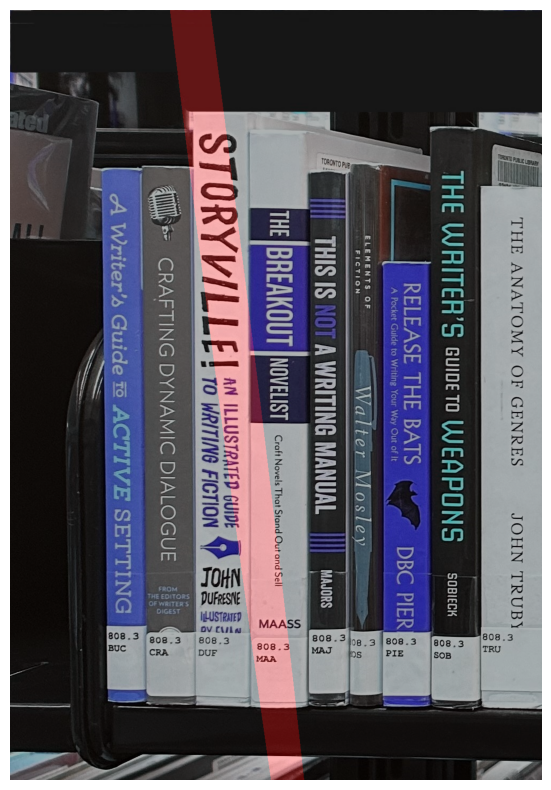

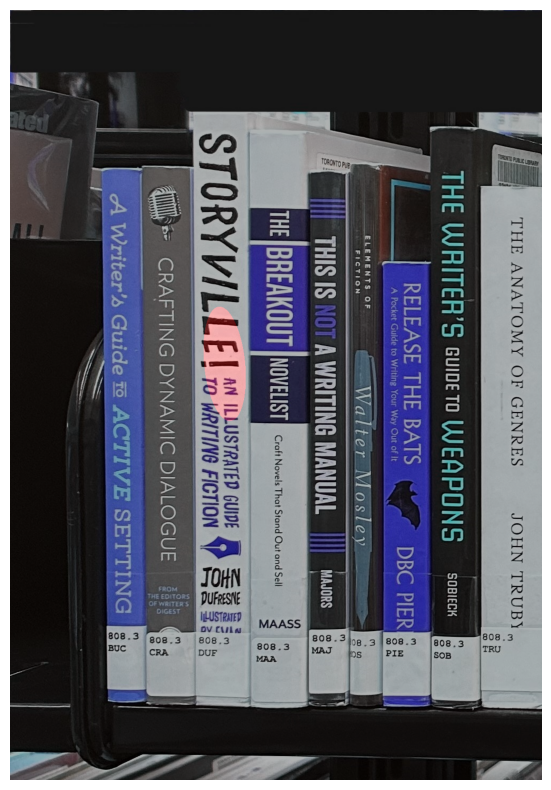

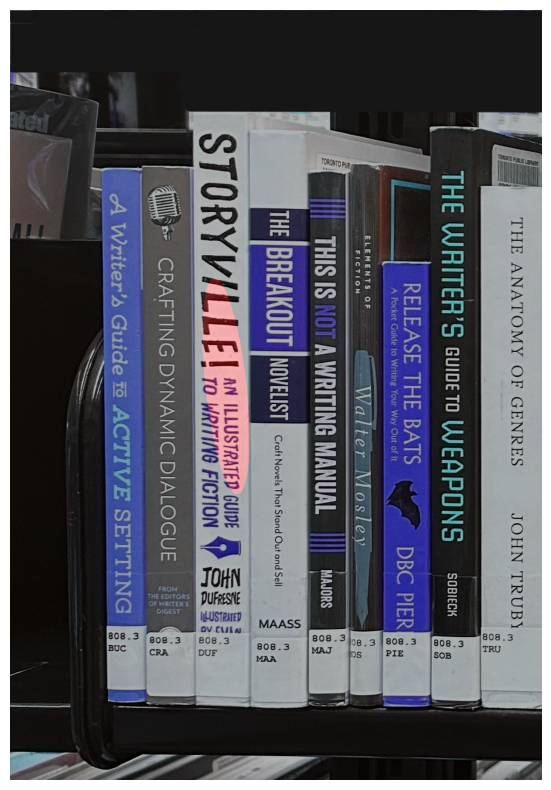

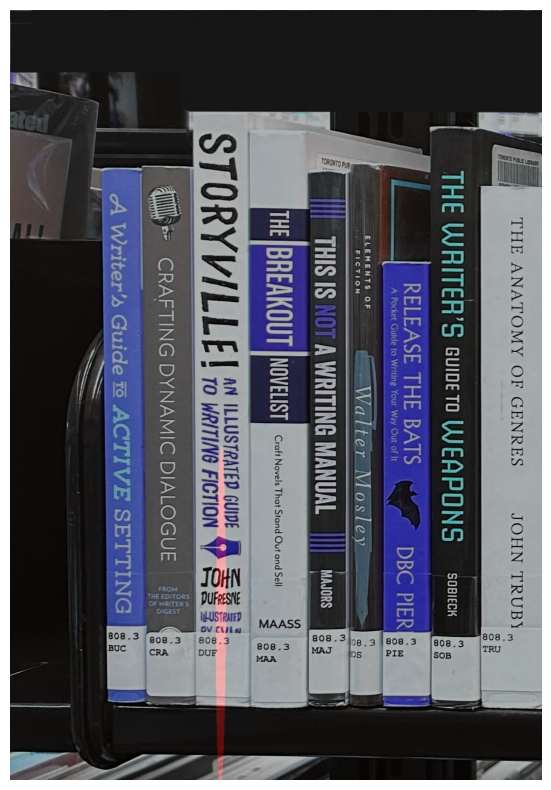

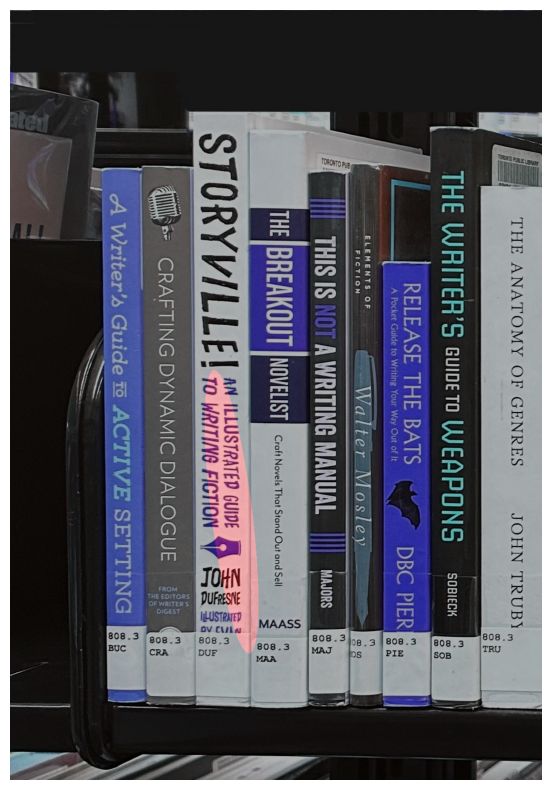

In [11]:
img2 = img[0:img.shape[0], 0:1000]
lst = ['STORYVILLE'] #, '!', 'AN', 'ILLUSTRATED', 'GUIDE']
for 
for e in lst:
    point = df.loc[df['txt'] == e].iloc[0]
    show_distance_check(img2, point)

In [3]:
def ensure_string(value):
    if isinstance(value, str):
        return value
    else:
        return str(value)


def collect_nonduplicate_names(shelf: pd.DataFrame):
    names = []
    for index, row in shelf.iterrows():
        names.append(row['Book Name'])
        names.append(row['Author Name'])

    splits = []

    for string in names:
        splits.extend(ensure_string(string).split())

    return splits, names

file_path = 'bookshelves_data.xlsx'

all_sheets_df = pd.read_excel(file_path, sheet_name=None)
shelf_1 = all_sheets_df['Bookshelves_1']
shelf_4 = all_sheets_df['Bookshelves_4']
shelf_5 = all_sheets_df['Bookshelves_5']
actual_names_1_split, actual_names_1 = collect_nonduplicate_names(shelf_1)
actual_names_4_split, actual_names_4 = collect_nonduplicate_names(shelf_4)
actual_names_5_split, actual_names_5 = collect_nonduplicate_names(shelf_5)

In [4]:
img_paths = ['./pics/IMG_1548.JPG', './pics/IMG_1545.JPG', './pics/IMG_1544.JPG']
actual_names = [(actual_names_1_split, actual_names_1), (actual_names_4_split, actual_names_4), (actual_names_5_split, actual_names_5)]
cropped_pics = []
for idx, path in enumerate(img_paths):
    im, cropped_img = crop_image(path)
    cropped_pics.append((cropped_img, im))

In [5]:
img = cropped_pics[0][0][0][0]
df_00 = df.loc[df['crop_idx'] == (0, 0)]

In [6]:
df_00

txt  confidence                                           vertices  \
0      TRUE         100         [(17, 357), (20, 394), (3, 395), (0, 358)]   
1     TALES         100         [(20, 401), (24, 449), (8, 450), (4, 402)]   
2        10         100       [(78, 338), (81, 365), (55, 368), (52, 341)]   
3      TALL         100       [(81, 366), (85, 406), (59, 409), (55, 369)]   
4     19119         100       [(67, 299), (70, 331), (59, 332), (56, 300)]   
..      ...         ...                                                ...   
363   STORY         100  [(2089, 1382), (2092, 1430), (2072, 1431), (20...   
364  BEGINS         100  [(2092, 1437), (2095, 1491), (2075, 1492), (20...   
365   KLEIN         100  [(2091, 566), (2096, 618), (2082, 619), (2077,...   
366     ALL         100  [(2099, 655), (2103, 686), (2089, 688), (2085,...   
367     BUT         100  [(2104, 694), (2109, 728), (2096, 729), (2091,...   

                                              boundBox            slopes  \
0    {'Width': 20, 'Height': 38, 'Left': 0, 'Top': ...   (10.06, -0.048)   
1    {'Width': 20, 'Height': 49, 'Left': 4, 'Top': ...   (9.788, -0.051)   
2    {'Width': 29, 'Height': 30, 'Left': 52, 'Top':...   (7.341, -0.094)   
3    {'Width': 30, 'Height': 43, 'Left': 55, 'Top':...   (8.157, -0.094)   
4    {'Width': 14, 'Height': 33, 'Left': 56, 'Top':...   (8.701, -0.074)   
..                                                 ...               ...   
363  {'Width': 23, 'Height': 49, 'Left': 2069, 'Top...  (13.051, -0.041)   
364  {'Width': 23, 'Height': 55, 'Left': 2072, 'Top...  (14.682, -0.041)   
365  {'Width': 19, 'Height': 53, 'Left': 2077, 'Top...   (8.483, -0.058)   
366  {'Width': 18, 'Height': 33, 'Left': 2085, 'Top...   (6.322, -0.117)   
367  {'Width': 18, 'Height': 35, 'Left': 2091, 'Top...   (5.547, -0.063)   

         width     height direction         mid_point crop_idx  Left   Top  
0    17.029386  37.121422  vertical     (10.0, 376.0)   (0, 0)     0   357  
1    16.031220  48.166378  vertical     (14.0, 425.5)   (0, 0)     4   401  
2    26.172505  27.166155  vertical     (66.5, 353.0)   (0, 0)    52   338  
3    26.172505  40.199502  vertical     (70.0, 387.5)   (0, 0)    55   366  
4    11.045361  32.140317  vertical     (63.0, 315.5)   (0, 0)    56   299  
..         ...        ...       ...               ...      ...   ...   ...  
363  20.024984  48.093659  vertical  (2080.5, 1406.5)   (0, 0)  2069  1382  
364  20.024984  54.083269  vertical  (2083.5, 1464.5)   (0, 0)  2072  1437  
365  14.035669  52.239832  vertical   (2086.5, 592.5)   (0, 0)  2077   566  
366  14.142136  31.256999  vertical   (2094.0, 671.5)   (0, 0)  2085   655  
367  13.038405  34.365681  vertical  (2100.0, 711.75)   (0, 0)  2091   694  

[368 rows x 12 columns]

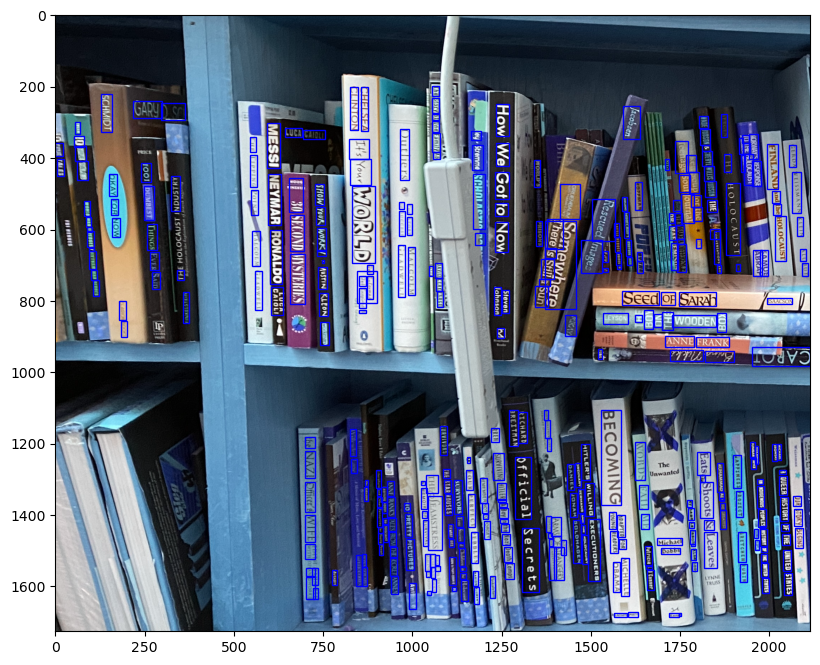

In [7]:
from plot_text_in_img import *

plot_text_detected(img, df_00)

In [8]:
# def distance_relative_wh(point1, point2, width, height, slope):
#     x_diff = point2[0] - point1[0]
#     y_diff = point2[1] - point1[1]
#     theta = math.atan(-1/slope)
#     sin_theta = math.sin(theta)
#     cos_theta = math.cos(theta)
#     rotated_x_diff = x_diff * cos_theta + y_diff * sin_theta
#     rotated_y_diff = y_diff * cos_theta - x_diff * sin_theta
#     
#     perpen_diff = rotated_x_diff / (width * X_DISTANCE_THRESHOLD)
#     parall_diff = rotated_y_diff / (height * Y_DISTANCE_THRESHOLD)
#     ellipse_check = sqrt(perpen_diff ** 2 + parall_diff ** 2)
# 
#     half_ellipse_check = rotated_y_diff <= 0
# 
#     return half_ellipse_check, ellipse_check
# 
# img2 = img[0:500, 0:1000]
# 
# mask = np.zeros_like(img2)
# ref_point = df.iloc[15]
# mid_point = (ref_point.mid_point[0], ref_point.mid_point[1])
# 
# for y in range(img2.shape[0]):
#     for x in range(img2.shape[1]):
#         top_ellipse, distance = distance_relative_wh(mid_point, (x, y), ref_point.width, ref_point.height, ref_point.slopes[0])
#         if top_ellipse and distance < 1:
#             mask[y, x] = [255, 0, 0]  # Set the mask to blue (in RGB) for pixels that pass the distance function
# 
# result = cv2.addWeighted(img2, 0.7, mask, 0.3, 0)
# 
# plt.figure(figsize=(10, 10))
# plt.imshow(result)
# plt.axis('off')
# plt.show()

In [9]:
related_text = group_related_text(df_00)
related_text

{0: [(0, 'TRUE', (10.0, 376.0)),
  (1, 'TALES', (14.0, 425.5), -0.22932708881988434)],
 1: [(1, 'TALES', (14.0, 425.5)),
  (0, 'TRUE', (10.0, 376.0), 0.18390135797250573)],
 2: [(2, '10', (66.5, 353.0)),
  (3, 'TALL', (70.0, 387.5), -0.2174181749381392),
  (4, '19119', (63.0, 315.5), 0.23875301277886124),
  (5, 'TALIS', (75.5, 435.25), -0.5142612937321073)],
 3: [(3, 'TALL', (70.0, 387.5)),
  (2, '10', (66.5, 353.0), 0.1463776049406012),
  (4, '19119', (63.0, 315.5), 0.30772426337525033),
  (5, 'TALIS', (75.5, 435.25), -0.1997259283573844),
  (6, 'WORLD', (89.0, 541.5), -0.6433393078992435),
  (7, 'WAR', (93.0, 578.5), -0.7977583172215577),
  (8, 'II', (95.5, 600.0), -0.8875865301522224)],
 4: [(4, '19119', (63.0, 315.5)),
  (2, '10', (66.5, 353.0), -0.20840442813962579),
  (3, 'TALL', (70.0, 387.5), -0.3922034500871782),
  (5, 'TALIS', (75.5, 435.25), -0.6345625029469832)],
 5: [(5, 'TALIS', (75.5, 435.25)),
  (2, '10', (66.5, 353.0), 0.2831253940889676),
  (3, 'TALL', (70.0, 387.5), 

In [10]:
filtered_data = remove_duplicates(related_text)
filtered_data

{0: [(0, 'TRUE', (10.0, 376.0)),
  (1, 'TALES', (14.0, 425.5), -0.22932708881988434)],
 6: [(6, 'WORLD', (89.0, 541.5)),
  (2, '10', (66.5, 353.0), 0.7882398556499374),
  (3, 'TALL', (70.0, 387.5), 0.64337951908652),
  (4, '19119', (63.0, 315.5), 0.9508347407646167),
  (5, 'TALIS', (75.5, 435.25), 0.44531391553352695),
  (7, 'WAR', (93.0, 578.5), -0.15886744526557808),
  (8, 'II', (95.5, 600.0), -0.2485983086277346),
  (9, 'HERGES', (98.5, 627.5), -0.36620436160092346),
  (10, '/', (102.0, 656.0), -0.4833423901551756),
  (11, 'VIETNAM', (104.5, 685.5), -0.6194192696330632),
  (12, 'WAN', (109.0, 727.0), -0.7973782796407441),
  (13, 'HERBES', (113.5, 764.0), -0.9485422177604649)],
 14: [(14, 'SCHMIDT', (143.5, 273.5)),
  (15, 'OKAY', (160.5, 476.0), -0.32519147539202903),
  (16, 'FOR', (165.0, 536.0), -0.4211912117389807),
  (17, 'NOW', (169.0, 594.0), -0.515859269164181),
  (18, 'CLARION', (187.5, 826.5), -0.8900728996607473),
  (19, 'BOOKS', (193.0, 879.5), -0.9724559270105412)],
 20:

In [11]:
def update_distance(element2, element1, df_all):
    # Assuming width and height are known or calculated previously
    # You may need to adjust the logic to calculate or retrieve width and height
    point1 = element1[2]
    point2 = element2[2]
    t1 = df_all.iloc[element1[0]]
    t1_slope = t1['slopes']
    t1_direction = t1['direction']
    if "vertical" == t1_direction:
        slope = t1_slope[0]
    elif "horizontal" == t1_direction:
        slope = t1_slope[1]
    else:
        slope = 0
    return distance_relative_wh(point1, point2, t1.width, t1.height, slope)

In [12]:
def combine_elements(data_dict, df_all):
    keys_to_remove = set()
    data = data_dict.copy()
    for key1 in data:
        point1 = data[key1][0]
        for key2 in data:
            if key1 < key2 and key1 not in keys_to_remove:
                set1 = set([item[0] for item in data[key1]])
                set2 = set([item[0] for item in data[key2]])
                           
                shared_elements = set1 & set2
                if shared_elements:
                    # Combine lists and update elements
                    # print(f"{key1}: {key2}")
                    combined_list = [item for item in data[key2] if item[0] not in [i[0] for i in data[key1]]]

                    # Update elements that are newly added from the smaller key's list
                    for index, item in enumerate(combined_list):
                        if item[0] not in shared_elements and item[0] != point1[0]:
                            # Update the 4th element using the update_distance function
                            # Assume point1, width, height, and slope are defined elsewhere
                            temp_lst = list(item)
                            updated_dist = update_distance(item, point1, df_all)
                            if len(temp_lst) == 4:
                                temp_lst[3] = updated_dist
                            else:
                                temp_lst.append(updated_dist)
                            combined_list[index] = tuple(temp_lst)
                    
                    combined_list = data[key1] + combined_list

                    # Deduplicate the combined list based on the first element of each tuple
                    unique_combined_list = []
                    seen = set()
                    for item in combined_list:
                        if item[0] not in seen:
                            unique_combined_list.append(item)
                            seen.add(item[0])

                    data[key1] = unique_combined_list
                    keys_to_remove.add(key2)

    # Remove keys
    for key in keys_to_remove:
        del data[key]

    return data

data = combine_elements(filtered_data, df_00)
data

{0: [(0, 'TRUE', (10.0, 376.0)),
  (1, 'TALES', (14.0, 425.5), -0.22932708881988434)],
 6: [(6, 'WORLD', (89.0, 541.5)),
  (2, '10', (66.5, 353.0), 0.7882398556499374),
  (3, 'TALL', (70.0, 387.5), 0.64337951908652),
  (4, '19119', (63.0, 315.5), 0.9508347407646167),
  (5, 'TALIS', (75.5, 435.25), 0.44531391553352695),
  (7, 'WAR', (93.0, 578.5), -0.15886744526557808),
  (8, 'II', (95.5, 600.0), -0.2485983086277346),
  (9, 'HERGES', (98.5, 627.5), -0.36620436160092346),
  (10, '/', (102.0, 656.0), -0.4833423901551756),
  (11, 'VIETNAM', (104.5, 685.5), -0.6194192696330632),
  (12, 'WAN', (109.0, 727.0), -0.7973782796407441),
  (13, 'HERBES', (113.5, 764.0), -0.9485422177604649)],
 14: [(14, 'SCHMIDT', (143.5, 273.5)),
  (15, 'OKAY', (160.5, 476.0), -0.32519147539202903),
  (16, 'FOR', (165.0, 536.0), -0.4211912117389807),
  (17, 'NOW', (169.0, 594.0), -0.515859269164181),
  (18, 'CLARION', (187.5, 826.5), -0.8900728996607473),
  (19, 'BOOKS', (193.0, 879.5), -0.9724559270105412)],
 20:

In [13]:
lst = []
for k, v in data.items():
    temp_lst = []
    for e in v:
        idx, txt, pos = e[:3]
        e_df = df_00.iloc[idx]
        vertical = e_df.direction == "vertical"
        slope = e_df.slopes[0] if vertical else -e_df.slopes[1]
        font = e_df.width if vertical else e_df.height
        temp_lst.append((idx, txt, pos, slope, font))
    lst.append(temp_lst)
lst

[[(0, 'TRUE', (10.0, 376.0), 10.06, 17.029386365926403),
  (1, 'TALES', (14.0, 425.5), 9.788, 16.0312195418814)],
 [(6, 'WORLD', (89.0, 541.5), 8.157, 14.0356688476182),
  (2, '10', (66.5, 353.0), 7.341, 26.1725046566048),
  (3, 'TALL', (70.0, 387.5), 8.157, 26.1725046566048),
  (4, '19119', (63.0, 315.5), 8.701, 11.04536101718726),
  (5, 'TALIS', (75.5, 435.25), 7.069, 25.079872407968907),
  (7, 'WAR', (93.0, 578.5), 7.069, 13.038404810405298),
  (8, 'II', (95.5, 600.0), 8.973, 14.0356688476182),
  (9, 'HERGES', (98.5, 627.5), 7.178, 14.0356688476182),
  (10, '/', (102.0, 656.0), 7.341, 13.038404810405298),
  (11, 'VIETNAM', (104.5, 685.5), 8.157, 14.0356688476182),
  (12, 'WAN', (109.0, 727.0), 7.341, 13.038404810405298),
  (13, 'HERBES', (113.5, 764.0), 7.015, 14.0356688476182)],
 [(14, 'SCHMIDT', (143.5, 273.5), 12.119, 22.02271554554524),
  (15, 'OKAY', (160.5, 476.0), 9.951, 18.027756377319943),
  (16, 'FOR', (165.0, 536.0), 11.692, 17.029386365926403),
  (17, 'NOW', (169.0, 594.

In [14]:
features = []
for l in lst:
    feature = np.array([[d[2][0], d[2][1], d[4]] for d in l])
    features.append(feature)
features

[array([[ 10.        , 376.        ,  17.02938637],
        [ 14.        , 425.5       ,  16.03121954]]),
 array([[ 89.        , 541.5       ,  14.03566885],
        [ 66.5       , 353.        ,  26.17250466],
        [ 70.        , 387.5       ,  26.17250466],
        [ 63.        , 315.5       ,  11.04536102],
        [ 75.5       , 435.25      ,  25.07987241],
        [ 93.        , 578.5       ,  13.03840481],
        [ 95.5       , 600.        ,  14.03566885],
        [ 98.5       , 627.5       ,  14.03566885],
        [102.        , 656.        ,  13.03840481],
        [104.5       , 685.5       ,  14.03566885],
        [109.        , 727.        ,  13.03840481],
        [113.5       , 764.        ,  14.03566885]]),
 array([[143.5       , 273.5       ,  22.02271555],
        [160.5       , 476.        ,  18.02775638],
        [165.        , 536.        ,  17.02938637],
        [169.        , 594.        ,  18.02775638],
        [187.5       , 826.5       ,  14.03566885],
        

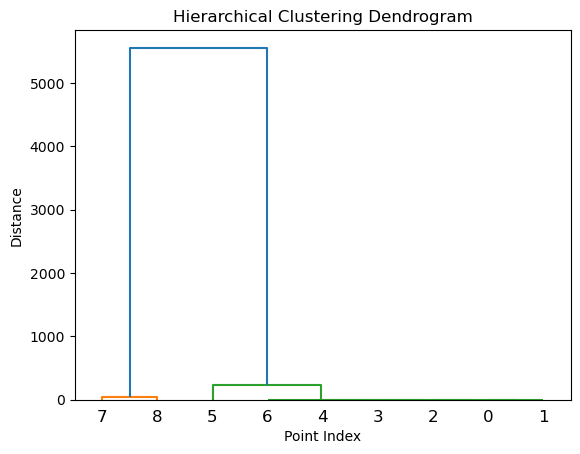

In [101]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
clusters = []

def custom_distance(point1, point2):
    spatial_dist = np.linalg.norm(point1[:2] - point2[:2])
    font_dist = abs(point1[2] - point2[2])
    combined_dist = spatial_dist * font_dist
    return combined_dist


condensed_distance_matrix  = pdist(features[8], metric=custom_distance)
Z = linkage(condensed_distance_matrix, 'ward')

plt.figure()
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Point Index')
plt.ylabel('Distance')
plt.show()
# for i, f in enumerate(features):
#     clusters.append(cluster)
#     print(f"{i}: {cluster}")

In [102]:
Z

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 9.00000000e+00, 0.00000000e+00, 3.00000000e+00],
       [3.00000000e+00, 1.00000000e+01, 0.00000000e+00, 4.00000000e+00],
       [4.00000000e+00, 1.10000000e+01, 0.00000000e+00, 5.00000000e+00],
       [6.00000000e+00, 1.20000000e+01, 0.00000000e+00, 6.00000000e+00],
       [7.00000000e+00, 8.00000000e+00, 4.65241873e+01, 2.00000000e+00],
       [5.00000000e+00, 1.30000000e+01, 2.36197103e+02, 7.00000000e+00],
       [1.40000000e+01, 1.50000000e+01, 5.55821376e+03, 9.00000000e+00]])

In [75]:
from scipy.cluster.hierarchy import fcluster

inconsistency_threshold = 0.8
cluster_labels = fcluster(Z, inconsistency_threshold, criterion='inconsistent')
cluster_labels

array([2, 2, 2, 2, 1, 1], dtype=int32)